# Análisis exploratorio de datos: Wine Dataset

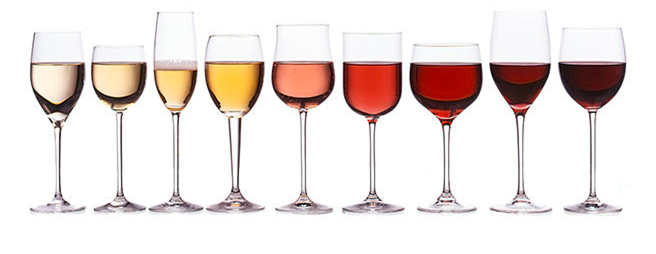

Qué vamos a hacer?

* Cargar el dataset.
* Realizar análisis descriptivos.
* Visualizar.

Esta notebook está basada en el material correspondiente al libro "Hands on Exploratory Data Analysis with Python"(Suresh Kumar Mukhiya , Usman Ahmed - ISBN: 9781789537253).

Vamos a trabajar con un dataset de calidad de vinos. Hay dos datasets disponibles, uno para [Vinos Tintos]("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv") y otro para [Vinos Blancos]("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv").

Estos datasets contienen información acerca de diversas propiedades físico-químicas de vinos. Además, cada vino tiene asociada un valor de calidad.

Los dos datasets tienen las mismas columnas. Vamos a trabajar solo con uno de ellos. Todos los análisis pueden replicarse en otro dataset sin problemas, cambiando la url de descarga.

In [2]:
import pandas as pd

In [3]:
df_wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")

Como los datos no incluyen valores nulos, vamos a agregar algunos nulos para poder trabajar con ellos.

In [4]:
import numpy as np

cols_list = df_wines.select_dtypes('number').columns.tolist() # seleccionamos las columnas numéricas para reemplazar valores
        
# removemos random algunos volores
for col in df_wines[cols_list]:
    df_wines.loc[df_wines.sample(frac=0.05).index, col] = np.nan
    
df_wines.loc['99999'] = np.nan # agregamos una fila completa de nan
df_wines['new_column'] = np.nan # agregamos una columna completa de nan

El dataset original ya tenía filas duplicadas, pero por las dudas que la duplicidad desaparezca por efecto de los nuevos valores nulos, agregamos algunas filas repetidas para poder trabajar con ellas.

In [ ]:
df_wines = df_wines.append(df_wines.sample(n=3, random_state=1))

In [ ]:
df_wines

### Análisis descriptivo

Pandas nos provee algunos métodos para hacer una exploración simple de los datos. Algunos de ellos son:
    
* ``columns``. Listar las etiquetas de las columnas del ``df``.
* ``dtypes``. Serie con los tipos de cada una de las columnas.
* ``describe``. Estadísticas descriptivas incluyendo aquellas que sumarizan la tendencia central, dispersión y forma de la distribución, excluyendo los valores nulos. Analiza tanto tipos numéricos como de objetos, así como también con datos mixtos. La salida que se obtiene depende de qué es lo que se le provee.
* ``info``. Imprime información del ``df``, incluyendo el tipo del index y las columnas, los valores no nulos y el uso de memoria.

In [ ]:
df_wines.columns

Qué significan las columnas?

* *Fixed acidity*. La cantidad de ácido tartárico en el vino, medido en $g/dm^3$.


* *Volatile acidity*. La cantidad de ácido acético en el vino, medido en $g/dm^3$.
* *Citric acid*: La cantidad de ácido cítrico en el vino, medido en $g/dm^3$.
* *Residual sugar*. La cantidad de azúcar luego del proceso de fermentación. Se mide en $g/dm^3$.
* *Free sulfur dioxide*. La cantidad de dióxido de sulfúrico libre en el vino, medido en $g/dm^3$.
* *Total sulfur dioxide*. La cantidad de dióxido de sulfúrico total en el vino, medido en $g/dm^3$. Sirve como un anti-oxidante y agente antimicróbial.
* *Density*. Densidad del vino, medida en $g/dm^3$.
* *pH*. Indica el pH del vino en el rango de 0 a 14, donde 0 indica alta acidez y 14 indica una sustancia básica.
* *Sulphates*. La cantidad de sulfato de potasio medida en $g/dm^3$.
* *Alcohol*. Indica el contenido de alcohol en el vino.
* *Quality*. Indica la calidad del vino en una escala de 1 a 10, donde a mayor valor, mayor calidad.

In [ ]:
df_wines.dtypes

In [ ]:
df_wines.describe()

En el ``df`` anterior tenemos estadísticas para todas las columnas, excluyendo valores ``NaN``. Vamos a obtener: cantidad de valores, media, desvío standard, valor mínimo, percentiles y valor máximo para cada columna.

In [ ]:
df_wines.info()

### Análisis de duplicados

Es muy probable que el ``df`` contenga algunos registros duplicados. Elminarlos es muy importante para mejorar la calidad del dataset.

Los dataframes tienen un método ``duplicated`` que termina una serie booleana que indica cuál de las filas están duplicadas.


In [ ]:
df_wines.duplicated()

Para borrarlas, podemos utilizar el método ``drop_duplicates``.

In [ ]:
df_wines.drop_duplicates()

Por defecto, tanto el método ``duplicates`` como el método ``drop_duplicates`` utilizan todas las columnas para realizar el análisis. Si este no es el comportamiento esperado, es posible especificar una lista de columnas a partir de las cuales realizar el análisis. 

También por defecto, al realizar el borrado se queda con la primera de las apariciones de la fila duplicada. Si se desease quedar con la última, hay que configurar el parámetro ``keep=last``. También se pueden eliminar todos los duplicados usando ``keep=False``.

Por ejemplo, vamos a considerar solo las columnas ``["fixed acidity", "volatile acidity"]``

In [ ]:
df_wines.drop_duplicates(["fixed acidity", "volatile acidity"])

Podemos ver que la cantidad de filas resultantes es diferente. Hay muchas más filas que comparten solo esas dos columnas que las que comparten todas las columnas.

In [ ]:
df_wines = df_wines.drop_duplicates()

### Análisis de valores faltantes

Cuando hay valores faltantes, se coloca un ``NaN``, lo que indica que no hay un valor especificado para ese índice/celda. Puede haber múltiples razones por la cual un valor puede ser ``NaN``, por ejemplo:

* Los datos son obtenidos de una fuente externa y hay valores incompletos.
* Se mergean dos dataset y algunos valores no se pueden matchear (por ejemplo, al hacer join left o right).
* Errores al recolectar los datos.
* Cambia la forma de los datos y hay algunas filas o columnas adicionales que no están determinadas.
* Se reindexan los datos, lo que resulta en datos incompletos.

Los ``NaN`` pueden aparecer de diversas formas:
    
* Una fila completa puede ser ``NaN``.
* Una columna completa puede ser ``NaN``.
* Solo algunos valores en una fila o columna pueden ser ``NaN``.

Es importante eliminar los valores nulos, dado que puede ser que las técnicas que usemos después no los soporten.

Para encontrar los valores nulos podemos utilizar la función ``isnull()``.

In [ ]:
df_wines.isnull()

Los valores ``True`` nos indican las celdas que son ``Nan``. De forma alternativa, podemos utilizar la función ``notnull()`` que hace (casi) lo mismo, en este caso, los ``True`` son los valores que no son nulos.

In [ ]:
df_wines.notnull()

Podemos utilizar el método ``sum()`` para contar la cantidad de valores nulos para cada columna/serie. Se sigue la lógica de que ``True`` suma 1, mientras que el ``False`` suma 0.

In [ ]:
df_wines.isnull().sum()

Para obtener la cantidad todal de nulos en el ``df``, podemos hacer un ``sum`` del ``sum``.

In [ ]:
df_wines.isnull().sum().sum()

Al revés, podemos contar cuántos valores son no nulos.

In [ ]:
df_wines.count()

#### Elminando nulos

Una de las alternativas para tratar con valores nulos es simplemente eliminarlos de nuestros datos. Para ello, podemos utilizar la función ``dropna()``, el cual nos va a retornar una copia del ``df`` eliminando las filas con nulos.

In [ ]:
df_wines.dropna()

Como elimina todas las filas donde haya al menos un nulo, el resultado es un ``df`` vacío.

Podríamos querer solo borrar las filas que son completamente nulas, seteando ``how='all'``.

In [ ]:
df_wines.dropna(how='all')

También podemos decidir borrar no en función de las filas, sino de las columnas. Para eso hay que pasar por parámetro ``axis=1`` o ``axis='columns'``.

In [ ]:
df_wines.dropna(axis=1)

También podemos definir un threshold a partir del cual realizar el borrado. Por ejemplo, que borre las filas si tiene más de 5 valores no nulos, o incluso una lista de columnas en las cuales chequear los nulos.

In [ ]:
df_wines.dropna(thresh=len(df_wines.columns)- 3) 

#### Operando con nulos

Pandas y numpy manejan de forma distinta los nulos:
    
* Cuando una función de numpy se encuentra con un nulo, retorna ``NaN``.
* Cuando pandas se encuentra con un nulo, lo ignora y sigue con el procesamiento. Por ejemplo, si está haciendo una suma, los ``NaN``, son considerados como 0, excepto que todos sean ``NaN``, en cuyo caso, el resultado es también ``NaN``.


#### Completando nulos

Una alternativa a borrar los nulos, es reemplazarlos por algún valor particular. Para esto, se puede utilizar la función ``fillna``.

In [ ]:
df_wines_0 = df_wines.fillna(0)
df_wines_0

Este reemplazo de los nulos por ceros, va a afectar las características estadísticas del dataset. Por ejemplo:

In [ ]:
df_wines.mean()

In [ ]:
df_wines_0.mean()

In [ ]:
df_wines.mean() - df_wines_0.mean()

Podemos observar que, depende de la columna hay cambios de más de 5 unidades. Entonces, puede que reemplazar por cero no sea la mejor opción.

Los nulos también pueden ser completados por los últimos valores conocidos haciendo "forward-filling":

In [ ]:
df_wines.fillna(method='ffill')

In [ ]:
df_wines.fillna(method='bfill') # haciendo backward-filling

En el último ejemplo al hacer el "backward filling", como no hay nada anterior a la última fila, la misma no puede ser reemplazada y va a quedar con los nulos.

#### Interpolando valores

Pandas tiene la función ``interpolate()`` tanto para las ``Series`` como para los ``df``. En este caso, para completar los valores faltantes realiza una interpolación lineal. 

In [ ]:
df_wines.interpolate()

Para este ejemplo, vamos a borrar todas las filas y columnas que sean completamente nulas y vamos a reemplazar los valores faltantes con la media de la columna.

In [ ]:
df_wines.dropna(how='all',inplace=True) # filas completas de nulos
df_wines.dropna(how='all',inplace=True,axis=1) # columnas completas de nulos
df_wines.fillna(df_wines.mean(),inplace=True)
df_wines

## Visualizaciones

In [ ]:
import seaborn as sns # importamos las bibliotecas que vamos a estar utilizando

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Análisis univariado

Esta es la forma más simple para analizar los datos. Significa que el análisis se concentra en una única variable a la vez. El objetivo es resumir los datos y encontrar patrones. No trata con causas o relaciones. 

Lo primero que podemos graficar es un histograma de los valores de alguna de las columnas. En este caso, vamos a considerar la columna ``quality``, que va a ser luego de interés para realizar predicciones.

In [ ]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(df_wines['quality'])

También podemos graficar los histogramas para todos los atributos que tenemos en nuestro ``df`` juntos.

In [ ]:
fig = df_wines.hist(bins=15,
    linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0,
    figsize=(10,9), grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

In [ ]:
También podemos ver la distribución de densidad (normalizada) una variable.

In [ ]:
sns.distplot(df_wines['alcohol']) # en próximas versiones esta función será deprecada

Como se observa, ``alcohol`` presenta un skewness positivo.

En estadística, skeweness es una medida de la asimetría de una distribución respecto a su media. Este valor puede ser positivo, negativo o indefinido. 

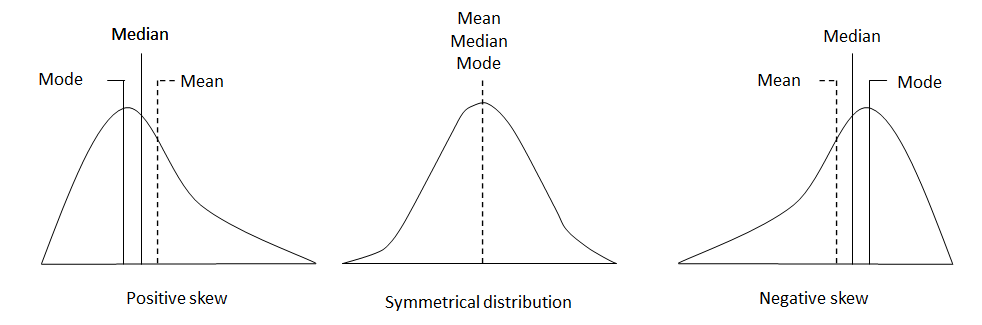

* En el gráfico de la derecha, la cola de la izquierda es mayor que la de la derecha. Esto indica que la distribución tiene skew hacia la izquierda. Si se selecciona cualquier punto de la cola más larga, la media sera menor que la moda. Esto se denomina *skewness negativo*.

* En el gráfico de la izquierda, la cola de la derecha es mayor que la de la izquierda. Si se seleeciona cualquier punto de la cola derecha, su valor medio será mayor que la moda. Esto se denomina *skeness positivo*.

* En el gráfico del centro, las colas son iguales, lo que determina una distribución simétrica.

Para chequear el skew de una distribución, podemos utilizar scipy.

In [ ]:
from scipy.stats import skew

skew(df_wines['alcohol'])

Este valor verifica el skeness positivo que se observada. Este análisis resulta importante para luego realizar la ingeniería de características.

Otra opción es directamente usar la función ``skew`` de Pandas para calcular el skewness de todas las columnas.

In [ ]:
df_wines.skew()

### Análisis bivariado

Como el nombre lo sugiere, este análisis incluye dos variables. El objetivo es determinar si existe una relación entre esas variables.

#### Correlación entre variables

La correlación nos indica cómo cambian las variables juntas, tanto sea ambas en la misma o diferente dirección y magnitud (la fuerza). Para encontrar la correlación vamos a utilizar el coeficiente de Pearson.

En términos de fuerza el valor de la correlación entre dos variables varía entre -1 y 1. Si la correlación es 1, entonces se dice que hay una correlación positiva/lineal, es decir, las variables son directamente proporcionales. Por el contrario, si la correlación es -1, entonces las variables son inversamente proporcionales. Valores cercanos a 0 no se supone que se encuentren correlacionados. Valores cercanos al 0.5 (o -0.5) indican correlaciones débiles.

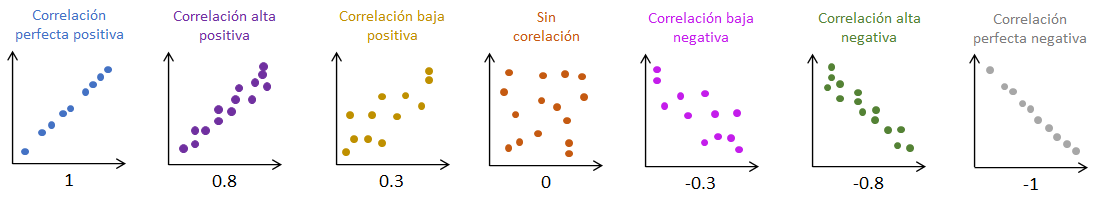

Para esto, podemos utilizar ``pairplot``, que grafica los scatter plots para cada par de columnas. Un scatter plot utiliza un sistema de coordenadas (cartesianas) para mostrar los valores de, típicamente (como en este caso), dos variables. A su vez, en la diagonal nos dejan ver la distribución de la variable individual. 

In [ ]:
sns.pairplot(df_wines)

En esta figura podemos obervar qué pares de columnas están correlacionadas. Podemos observar la existencia de algunas correlaciones positivas entre ``fixed acidity`` y ``density``. También hay una correlación negativa entre ``acidity`` y ``pH``, y entre ``alcohol percentage`` y ``dentisy``. 
    
Dado que no hay valores de correlación, puede existir sesgo en la interpretación. Por ejemplo, si se examina la correlación entre las columnas para la ``fixed acidity`` y la ``volatile acidity``, parece que hay una simetría. Sin embargo, también se pueden observar algunos puntos sparse a la derecha, con lo que puede parecer que hay una correlación levemente negativa. 

Es por eso que para cuantificar las correlaciones, utilizamos los heatmaps.

In [ ]:
sns.heatmap(df_wines.corr(), annot=True, fmt='.2f', linewidths=2)

Dado que nos importa la columna de ``quality`` (que luego la vamos a utilizar para hacer estimaciones), podemos observar que dicha columna tiene una correlación positiva con ``alcohol``, ``sulfates``, ``residual sugar``, ``citric acid``, and ``fixed acidity``. 

De este gráfico, es posible extraer las siguientes conclusiones:

* ``alcohol`` está positivamente correlacionado con ``quality`` del vino tinto.
* ``alcohol`` tiene una leve correlación positiva con ``pH``.
* ``citric acid`` y ``density`` tienen una fuerte correlación positiva con ``fixed acidity``.
* ``pH`` tiene una correlación negativa con ``density``, ``fixed acidity``, ``citric acid`` y ``sulfates``.

Dado que hay una correlación entre ``alcohol`` y ``quality``, vamos a analizar un poco más esas variables.

In [ ]:
sns.boxplot(x='quality', y='alcohol', data = df_wines)

En la figura hay algunos puntos por fuera de los plos. Esos son los outliers. Podemos eliminarlos seteando ``showfliers=False``.

In [ ]:
sns.boxplot(x='quality', y='alcohol', data = df_wines, showfliers=False)

A partir de esta figura parecería que a medida que la calidad del vino se incrementa, también lo hace la concentración de alcohol. 

Otra alternativa para visualizar correlaciones es directamente usar la función ``corr`` de Pandas.

In [ ]:
df_wines.corr()

### Análisis multivariado

Se corresponde con el análisis de tres o más variables. 

Una forma de hacer este tipo de análisis es utilizar bubble plot, los cuales son como scatter plots, donde cada punto es mostrado como una burbuja que puede tener diferente color, tamaño o apariencia.

En este ejemplo, vamos a graficar las relaciones entre ``fixed acidity``, ``free sulfur dioxide`` y ``total sulfur dioxide``, donde las dos primeras van a ubicarse en los ejes y la tercera afectará el tamaño de las burbujas.

In [ ]:
fig = plt.figure(figsize=(16, 12))

plt.scatter(x = df_wines['fixed acidity'], 
            y = df_wines['free sulfur dioxide'], 
            s = df_wines['total sulfur dioxide'] * 2,
            alpha=0.4, 
            edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('free sulfur dioxide')
plt.title('Wine free sulfur dioxide Content - Fixed Acidity - total sulfur dioxide', y=1.05)

Como se puede observar, cuanto más grande la burbuja, mayor el valor residual. 

### Extra. Qué visualización elegir?

No hay un standard para elegir qué tipo de visualización utilizar. Sin embargo, hay una serie de guías que se pueden seguir.

* Es importante entender qué tipo de datos tenemos. Si tenemos datos contínuos, un histograma puede ser una buena opción. Si tenemos un ranking, un gráfico de barras ordenadas puede ser una buena opción.
* Elegir el gráfico que transmita efectivamente el significado correcto y relevante de los datos sin distorcionar los hechos. 
* Lo simple suele ser lo mejor. Es mejor realizar un gráfico simple que se entienda, a un gráfico sofisticado que requiera de mucha explicación pra ser entenido.
* Elegir un gráfico que no sobrecargue al usuario con información. Debe ser claro.

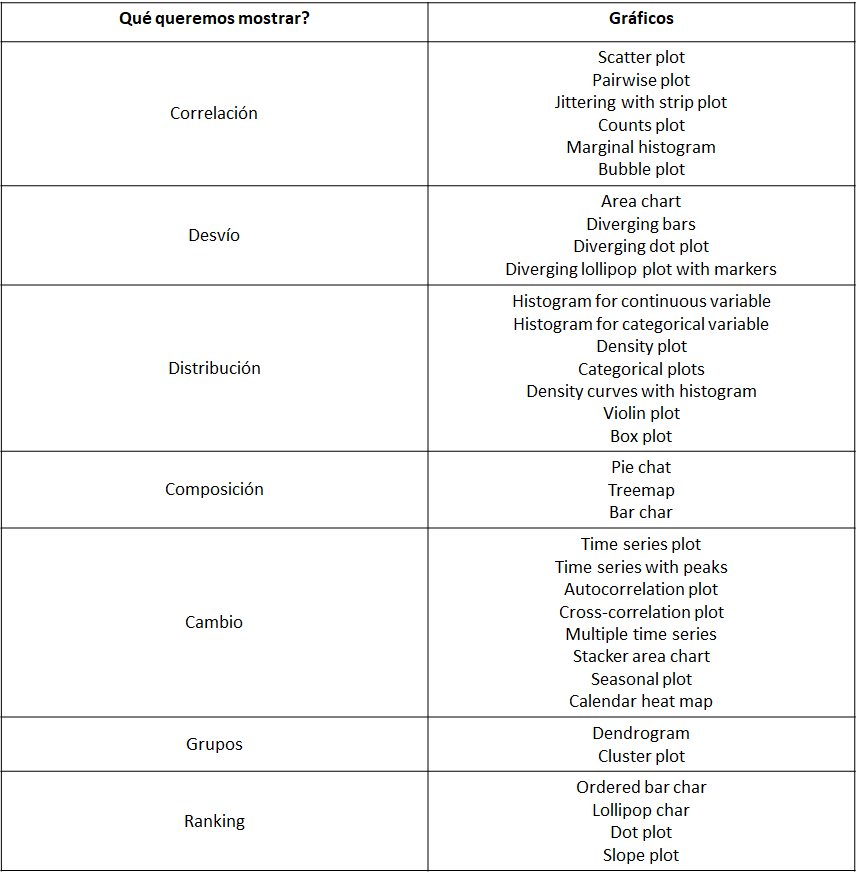